<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/4_feedforward_neural_networks_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

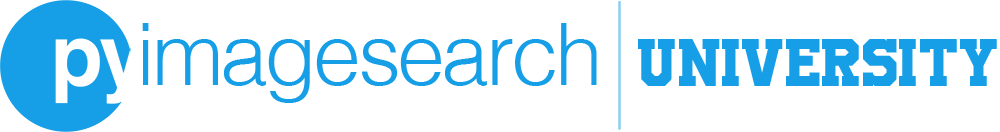

# Implementing feedforward neural networks with Keras and TensorFlow
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [Implementing feedforward neural networks with Keras and TensorFlow](https://www.pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/) blog post published on 2021-05-06.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/feedforward-neural-networks-keras/feedforward-neural-networks-keras.zip
!unzip -qq feedforward-neural-networks-keras.zip
%cd feedforward-neural-networks-keras

--2021-08-25 16:34:29--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/feedforward-neural-networks-keras/feedforward-neural-networks-keras.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.244.209
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.244.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2862 (2.8K) [binary/octet-stream]
Saving to: ‘feedforward-neural-networks-keras.zip’

feedforward-neural- 100%[===================>]   2.79K  --.-KB/s    in 0s      

2021-08-25 16:34:29 (47.0 MB/s) - ‘feedforward-neural-networks-keras.zip’ saved [2862/2862]

/content/feedforward-neural-networks-keras


## Blog Post Code

### Import Packages

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

### MNIST

In [3]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...
11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [6]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 3ms/step - loss: 2.2798 - accuracy: 0.2115 - val_loss: 2.2396 - val_accuracy: 0.3209
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2088 - accuracy: 0.3986 - val_loss: 2.1685 - val_accuracy: 0.4744
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.1271 - accuracy: 0.5066 - val_loss: 2.0696 - val_accuracy: 0.5800
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 2.0081 - accuracy: 0.5744 - val_loss: 1.9237 - val_accuracy: 0.5952
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.8392 - accuracy: 0.6136 - val_loss: 1.7278 - val_accuracy: 0.6512
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 1.6297 - accuracy: 0.6545 - val_loss: 1.5067 - val_accuracy: 0.6851
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 1.4149 - accuracy: 0.6960 - val_loss: 1.

In [7]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.88      0.89       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



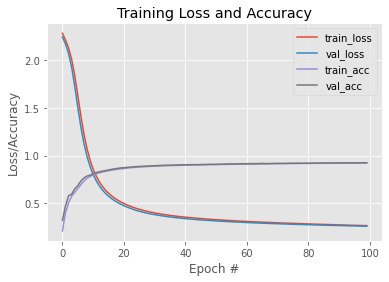

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### CIFAR10

In [9]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170508288/170498071 [==============================] - 4s 0us/step


In [10]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [11]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8319 - accuracy: 0.3462 - val_loss: 1.7437 - val_accuracy: 0.3862
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6452 - accuracy: 0.4188 - val_loss: 1.6198 - val_accuracy: 0.4294
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5652 - accuracy: 0.4483 - val_loss: 1.5882 - val_accuracy: 0.4309
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5083 - accuracy: 0.4668 - val_loss: 1.5381 - val_accuracy: 0.4461
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4597 - accuracy: 0.4859 - val_loss: 1.5407 - val_accuracy: 0.4468
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4189 - accuracy: 0.5002 - val_loss: 1.4767 - val_accuracy: 0.4700
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3847 - accuracy: 0.5127 

In [13]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.62      0.69      0.65      1000
  automobile       0.65      0.68      0.67      1000
        bird       0.47      0.43      0.45      1000
         cat       0.41      0.35      0.38      1000
        deer       0.52      0.45      0.49      1000
         dog       0.47      0.47      0.47      1000
        frog       0.57      0.69      0.62      1000
       horse       0.64      0.64      0.64      1000
        ship       0.67      0.70      0.69      1000
       truck       0.60      0.57      0.59      1000

    accuracy                           0.57     10000
   macro avg       0.56      0.57      0.56     10000
weighted avg       0.56      0.57      0.56     10000



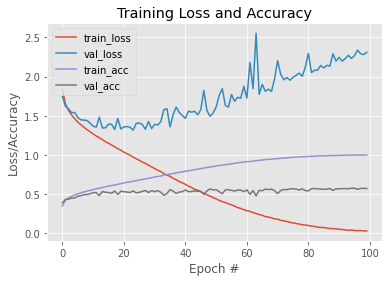

In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Implementing feedforward neural networks with Keras and TensorFlow*](https://www.pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/) published on 2021-05-06.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

5. **[The four key ingredients when training any neural network](https://www.pyimagesearch.com/2021/05/06/the-four-key-ingredients-when-training-any-neural-network/)** 

 6. **[Understanding weight initialization for neural networks](https://www.pyimagesearch.com/2021/05/06/understanding-weight-initialization-for-neural-networks/)** 